<a href="https://colab.research.google.com/github/l-abrahao/Aula-NLP/blob/main/Aula_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os.path
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def carregar_dados(path, nome_arq):
  lista_doc = []
  titulos = []

  with open (os.path.join (path, nome_arq), "r") as fin:
    for line in fin.readlines():
      text = line.strip()
      lista_doc.append(text)
  titulos.append(text[0:min(len(text),100)])

  return lista_doc, titulos


In [ ]:
def proc_dados(doc_set):
  tokenizer = RegexpTokenizer(r'\w+') #inicia tokenizer regex
  stop_words = set(stopwords.words('english'))#criar lista de stop words
  ps = PorterStemmer() #cria p stemmer
  texts = [] #lista de doc tokenizados

#percorrer a lista de doc
  for i in doc_set:
    #limpar e tokenizar string do doc
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    #remover stop words de tokens
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [ps.stem(i) for i in stopped_tokens]

    #add tokens a lista
    texts.append(stemmed_tokens)

  return texts


In [ ]:
def prep_corpus(doc_prep):
  #cria dicionário de termos para o corpus, cada termo atribuido a um indice
  dictionary = corpora.Dictionary(doc_prep)

  #converte o corpus em matriz
  corpus = [dictionary.doc2bow(text) for text in doc_prep]

  return dictionary, corpus

In [ ]:
def modelo_lsa (doc_prep, qtd_topicos, words):
  dictionary, corpus = prep_corpus(doc_prep)

  #cria modelo LSA
  lsamodel = LsiModel(corpus, num_topics = qtd_topicos, id2word = dictionary) #train model
  print(lsamodel.print_topics(num_topics = qtd_topicos, num_words = words))

  return lsamodel

In [ ]:
def calc_coerencia(dictionary, corpus, doc_prep, stop, start = 2, step = 3):
  valor_coerencia = []
  model_list = []

  for qtd_topicos in range(start, stop, step):

    #gera modelo LSA
    model = LsiModel(corpus, num_topics = qtd_topicos, id2word = dictionary)

    #modelo de treinamento
    model_list.append(model)
    coherence_model = CoherenceModel(model = model, texts = doc_prep, dictionary = dictionary)
    valor_coerencia.append(coherence_model.get_coherence())

  return model_list, valor_coerencia


In [ ]:
def plot(doc_prep, start, stop, step):
  dictionary,corpus = prep_corpus(doc_prep)
  model_list, valor_coerencia = calc_coerencia(dictionary, corpus, doc_prep, stop, start, step)

  #plot graph
  x = range(start, stop, step)
  plt.plot(x, valor_coerencia)
  plt.xlabel("Número de Tópicos")
  plt.ylabel("Score de Coerência")
  plt.legend(("valor_coerencia"), loc='best')
  plt.show()

[(0, '-0.395*"point" + -0.269*"first" + -0.250*"final" + -0.212*"quarter" + -0.203*"nba" + -0.200*"buck" + -0.188*"sun" + -0.172*"antetokounmpo" + -0.156*"player" + -0.134*"said"'), (1, '-0.363*"vaccin" + -0.328*"mask" + -0.289*"school" + -0.171*"student" + -0.169*"19" + -0.160*"guidanc" + -0.157*"covid" + -0.150*"univers" + -0.149*"effect" + -0.144*"recommend"'), (2, '0.313*"everi" + -0.299*"point" + 0.279*"day" + 0.270*"embrac" + 0.270*"champion" + 0.239*"final" + -0.224*"quarter" + 0.182*"made" + 0.177*"get" + 0.152*"play"'), (3, '-0.553*"fire" + -0.264*"deploy" + -0.202*"said" + -0.195*"oregon" + -0.184*"mobil" + -0.140*"tuesday" + -0.136*"time" + -0.135*"season" + -0.119*"mani" + -0.107*"acr"')]


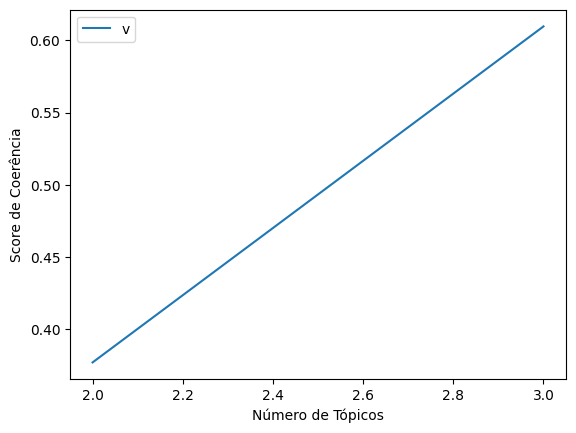

In [ ]:
qtdd_topicos = 4
words = 10
lista_doc, titulos = carregar_dados ("","/content/noticias.txt")
limpar_texto = proc_dados(lista_doc)
modelo = modelo_lsa(limpar_texto, qtdd_topicos, words)

start, stop, step = 2,4,1
plot(limpar_texto, start, stop, step)